In [1]:
import numpy as np #calculation of lenear Algebra
import pandas as pd #data frame (data processing, CSV file I/O) (e.g. pd.read_csv)
import seaborn as sns #data visualization
from matplotlib import pyplot as plt #data visualization
%matplotlib inline
import os #interact with the underlying operating system
# supress/hide warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PDFMalware2022.csv")
df.isnull().sum()
new_df=df.dropna(axis=0,how='any')

Mounted at /content/drive


In [3]:
print("Old Dataframe length: ", len(df))
print("New Dataframe lenght: ", len(new_df))
print("Number of rows with at least 1 Null Values: ",(len(df)-len(new_df)))

Old Dataframe length:  10026
New Dataframe lenght:  10023
Number of rows with at least 1 Null Values:  3


In [4]:
print(new_df['text'].value_counts())
print(len(new_df))

new_df = new_df[new_df.text !='-1']
new_df = new_df[new_df.text !='0']


No         5398
Yes        3761
unclear     549
-1          302
0            13
Name: text, dtype: int64
10023


In [5]:
new_df['text'].replace(['No','Yes','unclear', '-1', '0'],[0,1,2,3,4],inplace=True)
print(new_df['text'].value_counts())
print(len(new_df))

print("Clas names converted to 1 and 0:")
new_df['Class'].replace(['Malicious','Benign'],[1,0],inplace=True)
print(new_df['Class'].value_counts())

0    5398
1    3761
2     549
Name: text, dtype: int64
9708
Clas names converted to 1 and 0:
1    5244
0    4464
Name: Class, dtype: int64


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
fit_df = new_df.apply(le.fit_transform)
fit_df.describe()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
count,9708.00000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,...,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000,9708.000000
mean,4853.50000,68.070148,82.017099,3.288834,115.503193,9.435826,0.007108,0.021014,5.474866,0.500515,...,1.173877,1.265863,1.414916,1.008344,0.951483,0.958076,1.838381,0.999588,1.655954,0.540173
std,2802.60254,90.707512,75.085481,7.084881,212.536648,18.200827,0.084010,0.153833,13.942629,0.602611,...,2.169316,0.596926,0.945007,0.757390,0.257203,0.264662,3.489722,0.355388,4.065383,0.498409
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2426.75000,10.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,4853.50000,38.000000,70.000000,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,7280.25000,81.000000,127.000000,2.000000,80.000000,14.000000,0.000000,0.000000,2.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9707.00000,499.000000,390.000000,84.000000,901.000000,147.000000,1.000000,3.000000,87.000000,2.000000,...,39.000000,6.000000,8.000000,15.000000,5.000000,4.000000,17.000000,5.000000,58.000000,1.000000


In [7]:
fit_df.drop(['Fine name','pageno','AA','JBIG2Decode', 'launch','encrypt','embedded files', 'isEncrypted', 'RichMedia', 'Acroform','EmbeddedFile','title characters','Colors'],inplace=True,axis=1)

In [8]:
fit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9708 entries, 0 to 10025
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   pdfsize        9708 non-null   int64
 1   metadata size  9708 non-null   int64
 2   pages          9708 non-null   int64
 3   xref Length    9708 non-null   int64
 4   images         9708 non-null   int64
 5   text           9708 non-null   int64
 6   header         9708 non-null   int64
 7   obj            9708 non-null   int64
 8   endobj         9708 non-null   int64
 9   stream         9708 non-null   int64
 10  endstream      9708 non-null   int64
 11  xref           9708 non-null   int64
 12  trailer        9708 non-null   int64
 13  startxref      9708 non-null   int64
 14  ObjStm         9708 non-null   int64
 15  JS             9708 non-null   int64
 16  Javascript     9708 non-null   int64
 17  OpenAction     9708 non-null   int64
 18  XFA            9708 non-null   int64
 19  Class

In [9]:
from sklearn.model_selection import train_test_split

def data_split(data, data_target):
  X,X_test,Y,y_test= train_test_split(data, data_target,test_size=0.2, shuffle = True, random_state = 0)
  X_train,X_val,y_train,y_val = train_test_split(X, Y,test_size=0.1, shuffle = True, random_state = 0)
  print("X_train shape: {}".format(X_train.shape), "y_train shape: {}".format(y_train.shape))
  print("X_val shape: {}".format(X_val.shape), "y_val shape: {}".format(y_val.shape))
  print("X_test shape: {}".format(X_test.shape), "y_test shape: {}".format(y_test.shape))
  return X_train,X_val,X_test,y_train,y_val,y_test

target_name = 'Class'
data_target = fit_df['Class']
data = fit_df.drop(['Class'], axis=1)
X_train,X_val,X_test,y_train,y_val,y_test = data_split(data, data_target)

X_train shape: (6989, 19) y_train shape: (6989,)
X_val shape: (777, 19) y_val shape: (777,)
X_test shape: (1942, 19) y_test shape: (1942,)


For cross validation neural network only

def

Random forest classifier for feature importance

In [10]:
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import StandardScaler

Applying cross validation

In [11]:

model1 = Sequential()
model1.add(Dense(16, input_dim =19, activation ="relu"))
model1.add(Dense(32, activation = "relu"))
model1.add(Dense(32, activation = "relu"))
model1.add(Dense(16, activation = "relu"))
model1.add(Dense(8, activation = "relu"))
model1.add(Dense(1, activation ="sigmoid"))

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,593
Trainable params: 2,593
Non-trainabl

In [13]:
#model.compile(loss= "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"] )
model1.compile(loss= "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"] )


In [14]:
history1 = model1.fit(X_train, y_train,  epochs=300, batch_size=32, shuffle=True, validation_data =(X_val, y_val))

Epoch 1/300
219/219 [==============================] - 6s 4ms/step - loss: 0.5160 - accuracy: 0.7988 - val_loss: 0.3445 - val_accuracy: 0.8726
Epoch 2/300
219/219 [==============================] - 1s 3ms/step - loss: 0.2584 - accuracy: 0.9008 - val_loss: 0.2609 - val_accuracy: 0.9009
Epoch 3/300
219/219 [==============================] - 1s 3ms/step - loss: 0.2174 - accuracy: 0.9182 - val_loss: 0.2016 - val_accuracy: 0.9369
Epoch 4/300
219/219 [==============================] - 1s 3ms/step - loss: 0.1753 - accuracy: 0.9340 - val_loss: 0.1881 - val_accuracy: 0.9395
Epoch 5/300
219/219 [==============================] - 1s 3ms/step - loss: 0.1647 - accuracy: 0.9390 - val_loss: 0.2007 - val_accuracy: 0.9305
Epoch 6/300
219/219 [==============================] - 1s 3ms/step - loss: 0.1360 - accuracy: 0.9515 - val_loss: 0.2013 - val_accuracy: 0.9279
Epoch 7/300
219/219 [==============================] - 1s 3ms/step - loss: 0.1248 - accuracy: 0.9534 - val_loss: 0.2036 - val_accuracy: 0.9189

In [15]:
eval_model1=model1.evaluate(X_train, y_train)
eval_model1

219/219 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9976


[0.0065437969751656055, 0.9975675940513611]

In [16]:
y_pred1= model1.predict(X_test)
y_pred1 =(y_pred1>0.5)
y_pred1.shape

61/61 [==============================] - 0s 2ms/step


(1942, 1)

In [17]:
#Validation or test accuracy average
eval_model1_val=model1.evaluate(X_val, y_val)
eval_model1_val

25/25 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.9755


[0.46019744873046875, 0.9755469560623169]

In [18]:
# test accuracy average
eval_model1_test=model1.evaluate(X_test, y_test)
eval_model1_test

61/61 [==============================] - 0s 3ms/step - loss: 0.2402 - accuracy: 0.9799


[0.24024412035942078, 0.979917585849762]

In [19]:
print(y_test.shape)
print(y_pred1.shape)
y_pred1

(1942,)
(1942, 1)


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [20]:
result1 = confusion_matrix(y_test, y_pred1)
result1

array([[ 887,   23],
       [  16, 1016]])

In [34]:
tp = result1[0][0]
fp = result1[0][1]
fn = result1[1][0]
tn = result1[1][1]


p = tp / (fp + tp)
r = tp / (tp + fn)
f = (2*p* r)/ (p+r)

print(p)
print(r)
print(f)

0.9747252747252747
0.982281284606866
0.978488692774407


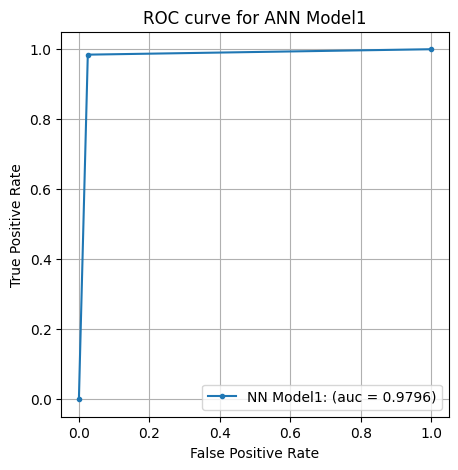

Precision: 0.9778633301251203
Recall: 0.9844961240310077
F1-score: 0.9811685176243361
Auc: 0.9796106993781412


In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
m1_nn_fpr, m1_nn_tpr, threshold = roc_curve(y_test, y_pred1)
auc_m1 = auc (m1_nn_fpr, m1_nn_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(m1_nn_fpr, m1_nn_tpr, marker='.', label='NN Model1: (auc = %0.4f)' % auc_m1)
plt.title('ROC curve for ANN Model1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Auc:", auc_m1)

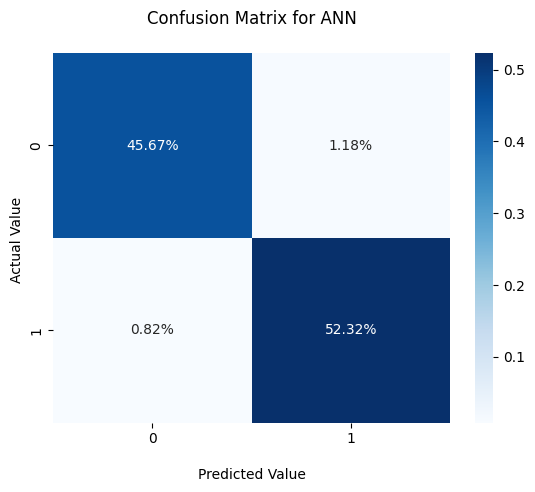

In [37]:


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred1)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for ANN\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()


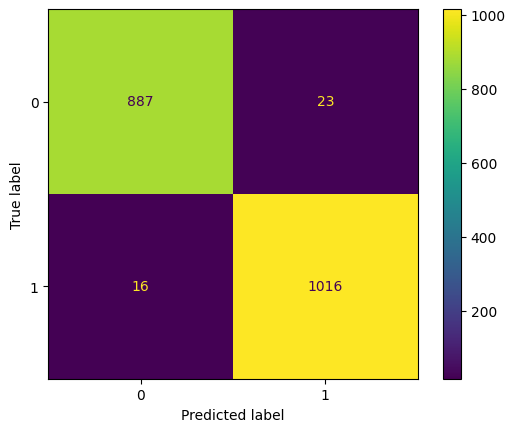

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=result1)
disp.plot()
plt.show()

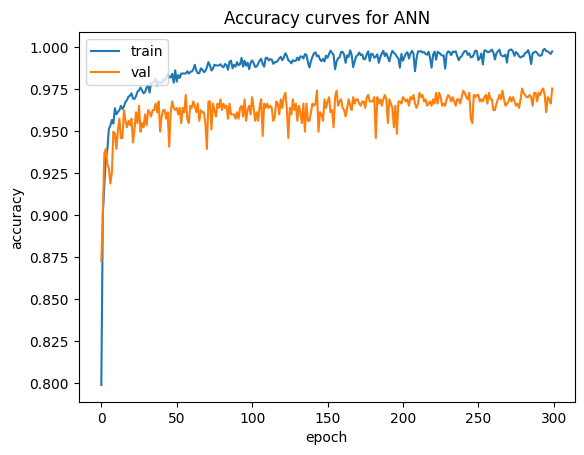

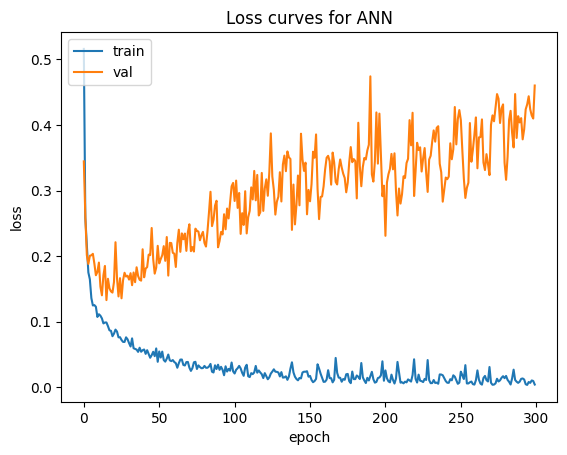

In [39]:
import keras

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy curves for ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss curves for ANN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The previous model had no std scaler neither dropout. Now std scaler will be applied.

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [41]:

model2 = Sequential()
model2.add(Dense(16, input_dim =19, activation ="relu"))
model2.add(Dense(32, activation = "relu"))
model2.add(Dense(32, activation = "relu"))
model2.add(Dense(16, activation = "relu"))
model2.add(Dense(8, activation = "relu"))
model2.add(Dense(1, activation ="sigmoid"))

In [42]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                320       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,593
Trainable params: 2,593
Non-traina

In [54]:
model2.compile(loss= "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"] )


In [55]:
history2 = model2.fit(X_train, y_train,  epochs=300, batch_size=32, shuffle=True, validation_data =(X_val, y_val))

Epoch 1/300
219/219 [==============================] - 2s 5ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.4437 - val_accuracy: 0.9755
Epoch 2/300
219/219 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.4666 - val_accuracy: 0.9755
Epoch 3/300
219/219 [==============================] - 1s 5ms/step - loss: 4.9048e-04 - accuracy: 0.9997 - val_loss: 0.4783 - val_accuracy: 0.9768
Epoch 4/300
219/219 [==============================] - 1s 6ms/step - loss: 9.9774e-04 - accuracy: 0.9994 - val_loss: 0.4479 - val_accuracy: 0.9768
Epoch 5/300
219/219 [==============================] - 1s 5ms/step - loss: 5.8613e-04 - accuracy: 0.9997 - val_loss: 0.4650 - val_accuracy: 0.9768
Epoch 6/300
219/219 [==============================] - 1s 6ms/step - loss: 7.9810e-04 - accuracy: 0.9997 - val_loss: 0.4713 - val_accuracy: 0.9755
Epoch 7/300
219/219 [==============================] - 1s 6ms/step - loss: 6.0589e-04 - accuracy: 0.9997 - val_loss: 0.4817 - 

In [57]:
eval_model2=model2.evaluate(X_train, y_train)
eval_model2

219/219 [==============================] - 1s 6ms/step - loss: 3.5974e-04 - accuracy: 1.0000


[0.0003597367031034082, 1.0]

In [58]:
y_pred2= model2.predict(X_test)
y_pred2 =(y_pred2>0.5)
y_pred2.shape

61/61 [==============================] - 1s 10ms/step


(1942, 1)

In [59]:
#Validation or test accuracy average
eval_model2_val=model2.evaluate(X_val, y_val)
eval_model2_val

25/25 [==============================] - 0s 10ms/step - loss: 0.3125 - accuracy: 0.9768


[0.31250452995300293, 0.9768339991569519]

In [60]:
#Validation or test accuracy average
eval_model2_test=model2.evaluate(X_test, y_test)
eval_model2_test

61/61 [==============================] - 1s 9ms/step - loss: 0.3060 - accuracy: 0.9804


[0.3059670329093933, 0.9804325699806213]

In [61]:
print(y_test.shape)
print(y_pred2.shape)
y_pred2

(1942,)
(1942, 1)


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [62]:
result2 = confusion_matrix( y_test , y_pred2)
result2

array([[ 886,   24],
       [  14, 1018]])

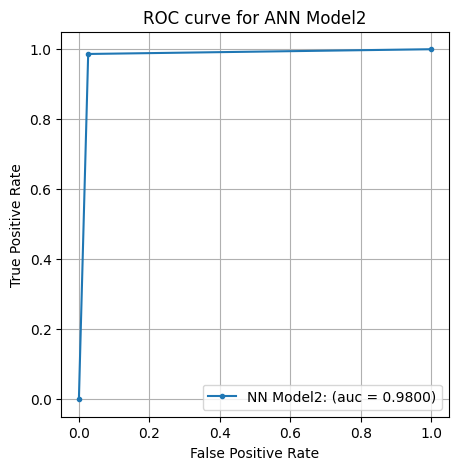

Precision: 0.9769673704414588
Recall: 0.9864341085271318
F1-score: 0.9816779170684667
Auc: 0.9800302410767527


In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_m2 = precision_score(y_test, y_pred2)
recall_m2 = recall_score(y_test, y_pred2)
f1_m2 = f1_score(y_test, y_pred2)
m2_nn_fpr, m2_nn_tpr, threshold = roc_curve(y_test, y_pred2)
auc_m2 = auc (m2_nn_fpr, m2_nn_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(m2_nn_fpr, m2_nn_tpr, marker='.', label='NN Model2: (auc = %0.4f)' % auc_m2)
plt.title('ROC curve for ANN Model2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
print("Precision:", precision_m2)
print("Recall:", recall_m2)
print("F1-score:", f1_m2)
print("Auc:", auc_m2)

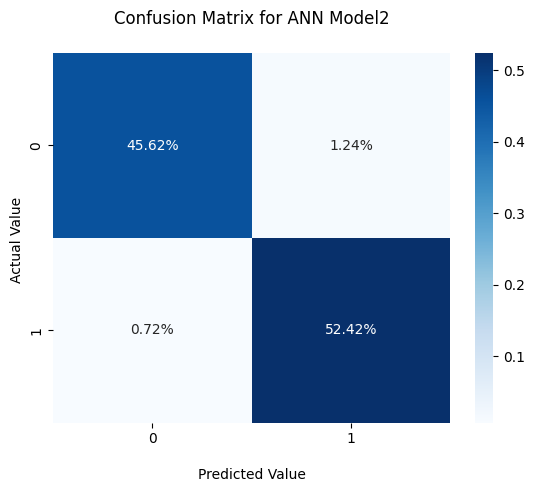

In [64]:
#Get the confusion matrix
#cf_matrix = confusion_matrix(y_test, y_pred2)
cf_matrix = result2
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for ANN Model2\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()


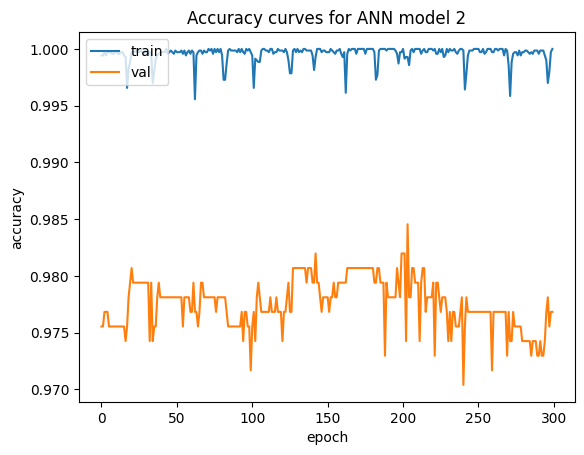

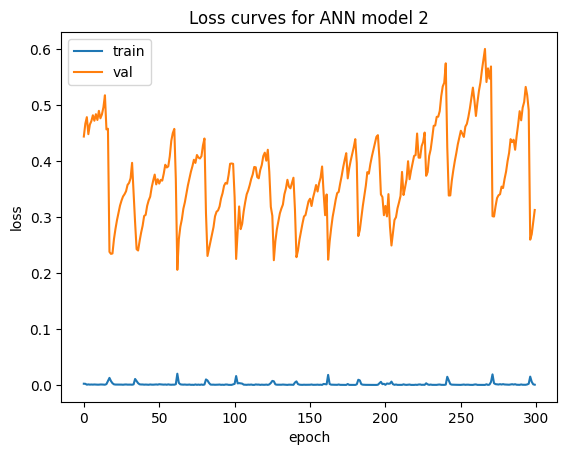

In [65]:
import keras

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy curves for ANN model 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss curves for ANN model 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Now the model3 will have dropout and bigger layers.

In [66]:

model3 = Sequential()
model3.add(Dense(64, input_dim =19, activation ="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation = "relu"))

model3.add(Dense(16, activation = "relu"))
model3.add(Dense(8, activation = "relu"))
model3.add(Dense(1, activation ="sigmoid"))


In [68]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1280      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 32)               

In [69]:
model3.compile(loss= "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"] )

In [71]:
history3 = model3.fit(X_train, y_train,  epochs=300, batch_size=32, shuffle=True, validation_data =(X_val, y_val))

Epoch 1/300
219/219 [==============================] - 1s 4ms/step - loss: 0.1024 - accuracy: 0.9710 - val_loss: 0.1218 - val_accuracy: 0.9704
Epoch 2/300
219/219 [==============================] - 1s 4ms/step - loss: 0.0836 - accuracy: 0.9765 - val_loss: 0.1209 - val_accuracy: 0.9691
Epoch 3/300
219/219 [==============================] - 1s 4ms/step - loss: 0.0684 - accuracy: 0.9811 - val_loss: 0.1267 - val_accuracy: 0.9704
Epoch 4/300
219/219 [==============================] - 1s 4ms/step - loss: 0.0623 - accuracy: 0.9814 - val_loss: 0.1112 - val_accuracy: 0.9730
Epoch 5/300
219/219 [==============================] - 1s 4ms/step - loss: 0.0557 - accuracy: 0.9835 - val_loss: 0.1239 - val_accuracy: 0.9730
Epoch 6/300
219/219 [==============================] - 1s 4ms/step - loss: 0.0531 - accuracy: 0.9840 - val_loss: 0.1130 - val_accuracy: 0.9717
Epoch 7/300
219/219 [==============================] - 1s 4ms/step - loss: 0.0508 - accuracy: 0.9838 - val_loss: 0.1080 - val_accuracy: 0.9743

In [72]:
eval_model3=model3.evaluate(X_train, y_train)
eval_model3

219/219 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.9997


[0.001245909370481968, 0.9997138381004333]

In [73]:
y_pred3= model3.predict(X_test)
y_pred3 =(y_pred3>0.5)
y_pred3.shape

61/61 [==============================] - 0s 1ms/step


(1942, 1)

In [74]:
#Validation or test accuracy average
eval_model3_val=model3.evaluate(X_val, y_val)
eval_model3_val

25/25 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.9833


[0.33068493008613586, 0.9832689762115479]

In [75]:
#Validation or test accuracy average
eval_model3_test=model3.evaluate(X_test, y_test)
eval_model3_test

61/61 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9892


[0.145455002784729, 0.9891864061355591]

In [76]:
result3 = confusion_matrix( y_test , y_pred3)
result3

array([[ 894,   16],
       [   5, 1027]])

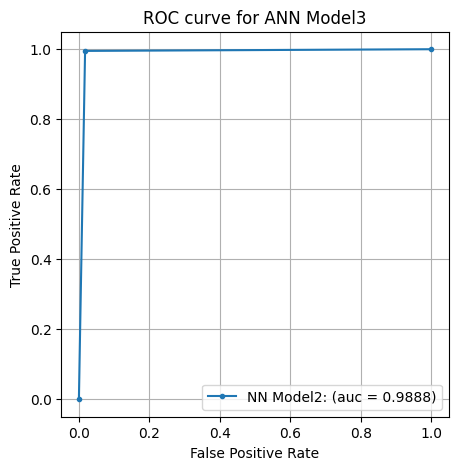

Precision: 0.9846596356663471
Recall: 0.9951550387596899
F1-score: 0.9898795180722891
Auc: 0.9887863105886361


In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_m3 = precision_score(y_test, y_pred3)
recall_m3 = recall_score(y_test, y_pred3)
f1_m3 = f1_score(y_test, y_pred3)
m3_nn_fpr, m3_nn_tpr, threshold = roc_curve(y_test, y_pred3)
auc_m3 = auc (m3_nn_fpr, m3_nn_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(m3_nn_fpr, m3_nn_tpr, marker='.', label='NN Model2: (auc = %0.4f)' % auc_m3)
plt.title('ROC curve for ANN Model3')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
print("Precision:", precision_m3)
print("Recall:", recall_m3)
print("F1-score:", f1_m3)
print("Auc:", auc_m3)

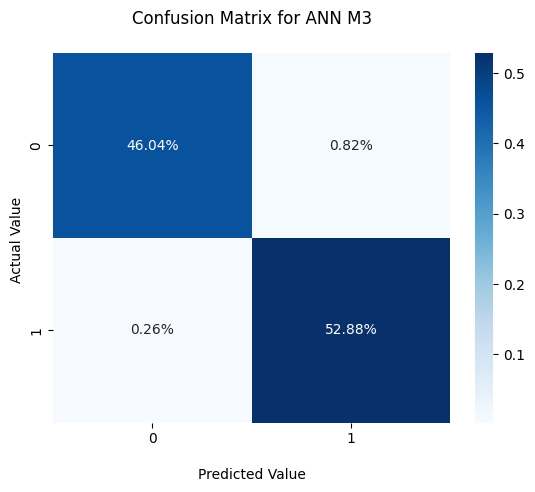

In [83]:


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred3)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for ANN M3\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()


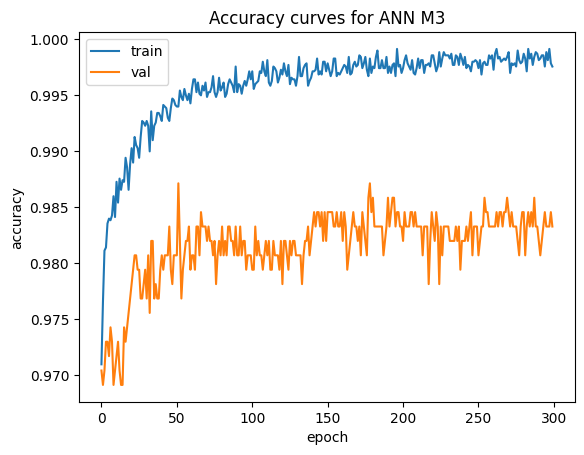

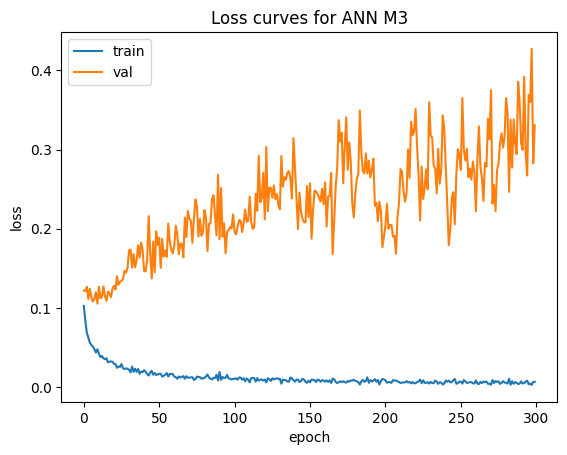

In [79]:
import keras

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy curves for ANN M3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss curves for ANN M3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

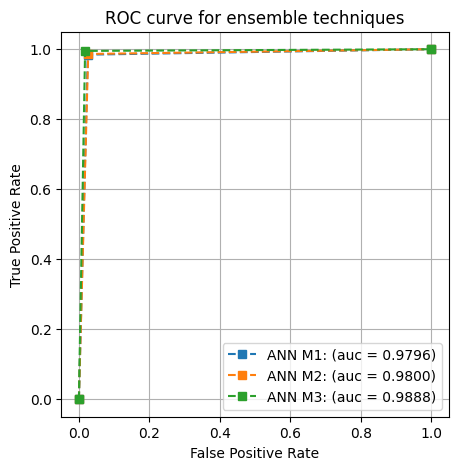

In [85]:


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(m1_nn_fpr, m1_nn_tpr, marker='s',linestyle='--', label='ANN M1: (auc = %0.4f)' % auc_m1)
plt.plot(m2_nn_fpr, m2_nn_tpr, marker='s',linestyle='--', label='ANN M2: (auc = %0.4f)' % auc_m2)
plt.plot(m3_nn_fpr, m3_nn_tpr, marker='s',linestyle='--', label='ANN M3: (auc = %0.4f)' % auc_m3)


plt.title('ROC curve for ensemble techniques')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid(True)
plt.show()